<a href="https://colab.research.google.com/github/morprukop/RetailSalesAnalysis/blob/nayma/Nayma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [ ]:
sns.set_palette("BrBG")

In [ ]:
df_features = pd.read_csv('/content/drive/Shareddrives/Project_1/Data/store_features.csv')
df_features.head(100)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,02/12/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,09/12/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
97,1,16/12/2011,51.63,3.159,5011.32,67.00,347.37,225.79,4011.37,219.179453,7.866,False
98,1,23/12/2011,47.96,3.112,2725.36,40.48,634.70,24.90,2739.43,219.357722,7.866,False


In [ ]:
df_sales = pd.read_csv('/content/drive/Shareddrives/Project_1/Data/sales.csv')
df_sales.head(10)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
5,1,1,2010-12-03,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-02-04,57258.43,False
9,1,1,2010-09-04,42960.91,False


In [ ]:
df_stores = pd.read_csv('/content/drive/Shareddrives/Project_1/Data/stores.csv')
df_stores.head(10)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
df_features.shape

(8190, 12)

In [ ]:
df_sales.shape

(140679, 5)

In [ ]:
df_stores.shape

(45, 3)

In [ ]:
from matplotlib import pyplot as plt

df_sales['Date'] = pd.to_datetime(df_sales['Date'])


df_features['Date'] = pd.to_datetime(df_features['Date'])

In [ ]:
df_features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [ ]:
df_sales.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [ ]:
(df_features['MarkDown1'] == 0).sum()

0

In [ ]:
(df_features['MarkDown5'] == 0).sum()

0

In [ ]:
df_features.fillna(0)

df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df_features = df_features.drop(['IsHoliday','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1)
df_sales = df_sales.drop(['IsHoliday'], axis = 1)


df_feat = df_features.dropna()
df_feat.shape


(7605, 6)

In [ ]:
df_features.shape

(8190, 6)

In [ ]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,42.31,2.572,211.096358,8.106
1,1,2010-12-02,38.51,2.548,211.242170,8.106
2,1,2010-02-19,39.93,2.514,211.289143,8.106
3,1,2010-02-26,46.63,2.561,211.319643,8.106
4,1,2010-05-03,46.50,2.625,211.350143,8.106


In [ ]:
df1 = pd.merge(df_features, df_sales, on = ['Date','Store']) 

In [ ]:
df = pd.merge(df1,  df_stores, on= 'Store')

In [ ]:
df.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Type,Size
0,1,2010-05-02,42.31,2.572,211.096358,8.106,1,24924.50,A,151315
1,1,2010-05-02,42.31,2.572,211.096358,8.106,2,50605.27,A,151315
2,1,2010-05-02,42.31,2.572,211.096358,8.106,3,13740.12,A,151315
3,1,2010-05-02,42.31,2.572,211.096358,8.106,4,39954.04,A,151315
4,1,2010-05-02,42.31,2.572,211.096358,8.106,5,32229.38,A,151315


In [ ]:
# key range for holiday dictionary
# 0. : memorial day, 1: Halloween, 2: Thanksgiving, 3: Black Friday, 4: Christmas, 5: NYE
#Monday, May 31

holiRange = [{'Holiday':'Memorial Day','Beg. Date':'2010-05-31', 'End Date': '2010-05-31'}
             ,{'Holiday':'Halloween','Beg. Date':'2010-10-17', 'End Date': '2010-10-31'}
             ,{'Holiday':'Thanksgiving','Beg. Date':'2010-11-11', 'End Date': '2010-11-25'}
             ,{'Holiday':'Black Friday','Beg. Date':'2010-11-26', 'End Date': '2010-11-26'}
             ,{'Holiday':'Christmas','Beg. Date':'2010-12-11', 'End Date': '2010-12-25'}
             ,{'Holiday':'New Years Eve','Beg. Date':'2010-12-17', 'End Date': '2010-12-31'}]


df_h = pd.DataFrame.from_records(holiRange)
#giving custom unique keys
df_h = pd.DataFrame.from_records(holiRange, index=['0', '1', '2','3','4','5'])
df_h = pd.DataFrame.from_dict(holiRange, orient='columns')

# Convert a list of dictionaries using json_normalize().
df_h = pd.json_normalize(holiRange)

df_h['Beg. Date'] = pd.to_datetime(df_h['Beg. Date'])
df_h['End Date'] = pd.to_datetime(df_h['End Date'])

In [ ]:
# IsHoliday = []
# Holiday = []
# for daye in df["Date"]:
#   givDay = daye.day
#   givMonth = daye.month

#   for i in range(0,6):
#     startDate = df_h.iloc[i]['Beg. Date'].day

#     startMonth = df_h.iloc[i]['Beg. Date'].month
#     diff = givDay - startDate

#     if givMonth == startMonth: 
#       if diff <= 14 and diff >= 0:
#         Holiday.append(df_h.iloc[i]['Holiday'])
#         IsHoliday.append(True)
#         break
#       elif i == 5:
#         Holiday.append('None')
#         IsHoliday.append(False)
#         break
#     elif i == 5: 
#       Holiday.append('None')
#       IsHoliday.append(False)
#       break
#     else: 
#       continue

In [ ]:
# df['Holiday'] = Holiday
# df['IsHoliday'] = IsHoliday

df = pd.read_csv('/content/drive/Shareddrives/Project_1/Data/cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#group by holidays for weekly sum
holiSum = df.groupby('Holiday').sum()

holiMean = df.groupby('Holiday').mean()

In [ ]:
df['Date'].dt.month

0          5
1          5
2          5
3          5
4          5
          ..
140674    12
140675    12
140676    12
140677    12
140678    12
Name: Date, Length: 140679, dtype: int64

In [ ]:
df['Date'].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
140674    2010
140675    2010
140676    2010
140677    2010
140678    2010
Name: Date, Length: 140679, dtype: int64

In [ ]:
df['Date'].dt.year.nunique()

1

In [ ]:
df.head()


,Unnamed: 0,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Type,Size,Day,Month,Year,Week_day,Holiday,IsHoliday
0,0,1,2010-05-02,42.31,2.572,211.096358,8.106,1,24924.50,A,151315,2,5,2010,Sunday,None,False
1,1,1,2010-05-02,42.31,2.572,211.096358,8.106,2,50605.27,A,151315,2,5,2010,Sunday,None,False
2,2,1,2010-05-02,42.31,2.572,211.096358,8.106,3,13740.12,A,151315,2,5,2010,Sunday,None,False
3,3,1,2010-05-02,42.31,2.572,211.096358,8.106,4,39954.04,A,151315,2,5,2010,Sunday,None,False
4,4,1,2010-05-02,42.31,2.572,211.096358,8.106,5,32229.38,A,151315,2,5,2010,Sunday,None,False


In [ ]:
df.shape

(140679, 17)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Day', 'Month',
       'Year', 'Week_day', 'Holiday', 'IsHoliday'],
      dtype='object')

# New Section

# New Section

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# Get the year, month and day of a measurement
tenth_measurement = df_sales['Date'].iloc[10]
print(f'The tenth measurement occurred in {tenth_measurement.year} in month {tenth_measurement.month} and day {tenth_measurement.day}')

The tenth measurement occurred in 2010 in month 4 and day 16


In [ ]:
df_features['Date']

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
8185   2013-06-28
8186   2013-05-07
8187   2013-12-07
8188   2013-07-19
8189   2013-07-26
Name: Date, Length: 8190, dtype: datetime64[ns]

In [ ]:
df_sales['Date']

0        2010-05-02
1        2010-12-02
2        2010-02-19
3        2010-02-26
4        2010-05-03
            ...    
140674   2010-03-12
140675   2010-10-12
140676   2010-12-17
140677   2010-12-24
140678   2010-12-31
Name: Date, Length: 140679, dtype: datetime64[ns]

In [ ]:
df['Year'] = df['Date'].dt.year
df['Year']

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
140674    2010
140675    2010
140676    2010
140677    2010
140678    2010
Name: Year, Length: 140679, dtype: int64

In [ ]:
df.groupby('Year')

In [ ]:
for year, data in df.groupby('Year'):
  print(f'Year = {year}')
  print(data) 

Year = 2010
        Unnamed: 0  Store       Date  ...  Week_day        Holiday  IsHoliday
0                0      1 2010-05-02  ...    Sunday           None      False
1                1      1 2010-05-02  ...    Sunday           None      False
2                2      1 2010-05-02  ...    Sunday           None      False
3                3      1 2010-05-02  ...    Sunday           None      False
4                4      1 2010-05-02  ...    Sunday           None      False
...            ...    ...        ...  ...       ...            ...        ...
140674      140674     45 2010-12-31  ...    Friday  New Years Eve       True
140675      140675     45 2010-12-31  ...    Friday  New Years Eve       True
140676      140676     45 2010-12-31  ...    Friday  New Years Eve       True
140677      140677     45 2010-12-31  ...    Friday  New Years Eve       True
140678      140678     45 2010-12-31  ...    Friday  New Years Eve       True

[140679 rows x 17 columns]


In [ ]:
for year, data in df.groupby('Year'):
  print(f'Year = {year}')
  unemployed = data['Unemployment'].sum()
  print(f'Number of unemployoments = {unemployed}')

Year = 2010
Number of unemployoments = 1188234.9679999999


In [ ]:
for month, data in df.groupby('Month'):
  print(f'Month = {month}')
  unemployed = data['Unemployment'].sum()
  print(f'Number of unemployoments per month = {unemployed}')

Month = 1
Number of unemployoments per month = 24753.673000000003
Month = 2
Number of unemployoments per month = 100115.571
Month = 3
Number of unemployoments per month = 99879.409
Month = 4
Number of unemployoments per month = 98918.24599999998
Month = 5
Number of unemployoments per month = 149148.024
Month = 6
Number of unemployoments per month = 73742.23800000001
Month = 7
Number of unemployoments per month = 98062.60900000001
Month = 8
Number of unemployoments per month = 97674.091
Month = 9
Number of unemployoments per month = 98376.494
Month = 10
Number of unemployoments per month = 123591.609
Month = 11
Number of unemployoments per month = 73935.184
Month = 12
Number of unemployoments per month = 150037.81999999998


In [ ]:
for year, data in df.groupby('Year'):
  print(f'Month = {year}')
  unemployed = data['Unemployment'].sum()
  print(f'Number of unemployoments in = {unemployed}')

Month = 2010
Number of unemployoments in = 1188234.9679999999


In [ ]:
for month, data in df.groupby('Month'):
  print(f'Month = {month}')
  unemployed = data['Unemployment'].sum()
  print(f'Number of unemployoments per month = {unemployed}')

Month = 1
Number of unemployoments per month = 24753.673000000003
Month = 2
Number of unemployoments per month = 100115.571
Month = 3
Number of unemployoments per month = 99879.409
Month = 4
Number of unemployoments per month = 98918.24599999998
Month = 5
Number of unemployoments per month = 149148.024
Month = 6
Number of unemployoments per month = 73742.23800000001
Month = 7
Number of unemployoments per month = 98062.60900000001
Month = 8
Number of unemployoments per month = 97674.091
Month = 9
Number of unemployoments per month = 98376.494
Month = 10
Number of unemployoments per month = 123591.609
Month = 11
Number of unemployoments per month = 73935.184
Month = 12
Number of unemployoments per month = 150037.81999999998


In [ ]:
for month, data in df.groupby('Month'):
  print(f'Month = {month}')
  weekly = data['Weekly_Sales'].mean()
  print(f'Weekly Sales per month = {weekly}')

Month = 1
Weekly Sales per month = 14391.780534923313
Month = 2
Weekly Sales per month = 16244.436210785012
Month = 3
Weekly Sales per month = 15828.833079472948
Month = 4
Weekly Sales per month = 15701.015586401245
Month = 5
Weekly Sales per month = 15971.989499117717
Month = 6
Weekly Sales per month = 16278.409330285645
Month = 7
Weekly Sales per month = 15785.689679602558
Month = 8
Weekly Sales per month = 15866.055025363146
Month = 9
Weekly Sales per month = 15339.655205292407
Month = 10
Weekly Sales per month = 15742.806494789133
Month = 11
Weekly Sales per month = 18118.582008444606
Month = 12
Weekly Sales per month = 18285.0140947107


In [ ]:

df_features.tail(10)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
8180,45,2013-05-24,67.11,3.627,NaN,NaN
8181,45,2013-05-31,65.88,3.646,NaN,NaN
8182,45,2013-07-06,70.71,3.633,NaN,NaN
8183,45,2013-06-14,70.01,3.632,NaN,NaN
8184,45,2013-06-21,70.13,3.626,NaN,NaN
8185,45,2013-06-28,76.05,3.639,NaN,NaN
8186,45,2013-05-07,77.50,3.614,NaN,NaN
8187,45,2013-12-07,79.37,3.614,NaN,NaN
8188,45,2013-07-19,82.84,3.737,NaN,NaN
8189,45,2013-07-26,76.06,3.804,NaN,NaN


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


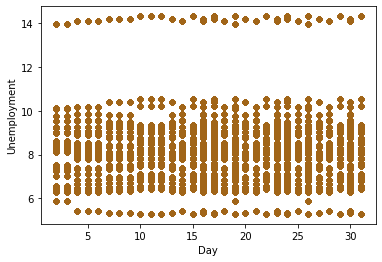

In [ ]:
df.plot(kind='scatter', x='Day', y='Unemployment')

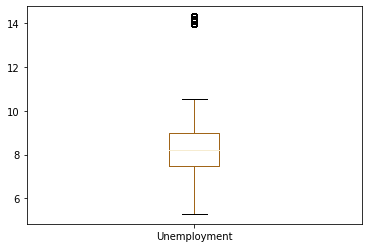

In [ ]:
df.plot(kind='box', x='Month', y='Unemployment' )

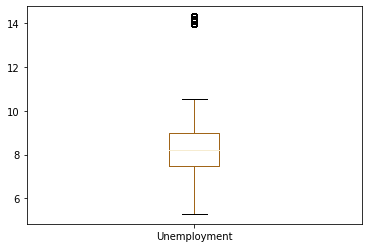

In [ ]:
df.plot(kind='box', x='Month', y='Unemployment' )

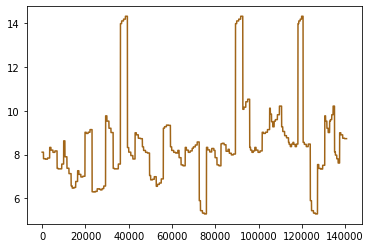

In [ ]:
df['Unemployment'].plot()

In [ ]:
df['CPI'].nunique()

720

In [ ]:
df.groupby('CPI')

In [ ]:
df['CPI']

0         211.096358
1         211.096358
2         211.096358
3         211.096358
4         211.096358
             ...    
140674    182.571448
140675    182.571448
140676    182.571448
140677    182.571448
140678    182.571448
Name: CPI, Length: 140679, dtype: float64

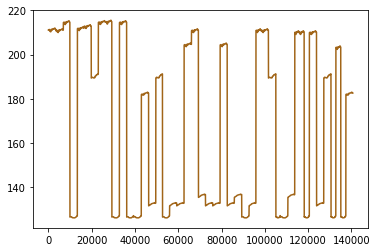

In [ ]:
df['CPI'].plot()

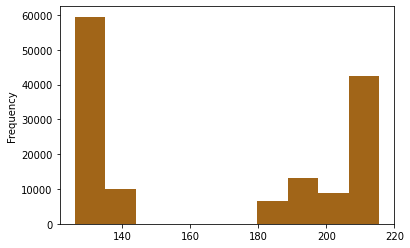

In [ ]:
df['CPI'].plot(kind='hist')

CPI
126.064000    AxesSubplot(0.125,0.125;0.775x0.755)
126.076645    AxesSubplot(0.125,0.125;0.775x0.755)
126.085452    AxesSubplot(0.125,0.125;0.775x0.755)
126.089290    AxesSubplot(0.125,0.125;0.775x0.755)
126.101935    AxesSubplot(0.125,0.125;0.775x0.755)
                              ...                 
215.408176    AxesSubplot(0.125,0.125;0.775x0.755)
215.437285    AxesSubplot(0.125,0.125;0.775x0.755)
215.457361    AxesSubplot(0.125,0.125;0.775x0.755)
215.506545    AxesSubplot(0.125,0.125;0.775x0.755)
215.555730    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Month, Length: 720, dtype: object

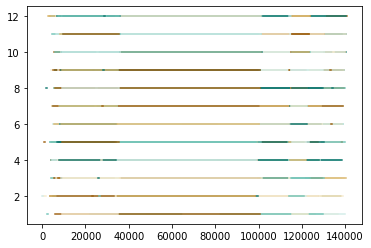

In [ ]:
df.groupby('CPI')['Month'].plot()

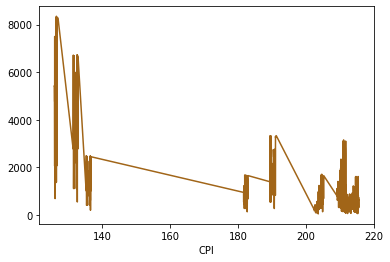

In [ ]:
df.groupby('CPI')['Month'].sum().plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


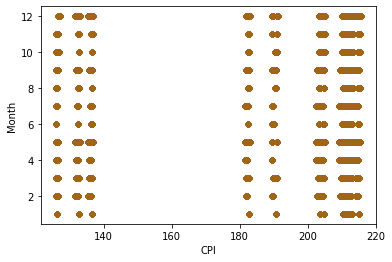

In [ ]:
df.plot('CPI', 'Month', kind='scatter')

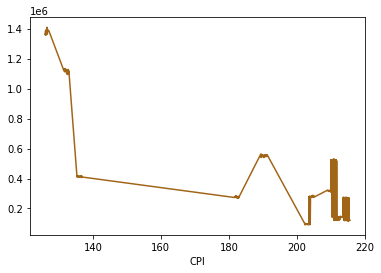

In [ ]:
df.groupby('CPI')['Year'].sum().plot()

In [ ]:
df.columns

Index(['Unnamed: 0', 'Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Day', 'Month',
       'Year', 'Week_day', 'Holiday', 'IsHoliday'],
      dtype='object')

In [ ]:
negative_df = df.filter(['CPI','Fuel_Price','Temperature'], axis=1)

In [ ]:
negative_df.head()

,CPI,Fuel_Price,Temperature
0,211.096358,2.572,42.31
1,211.096358,2.572,42.31
2,211.096358,2.572,42.31
3,211.096358,2.572,42.31
4,211.096358,2.572,42.31


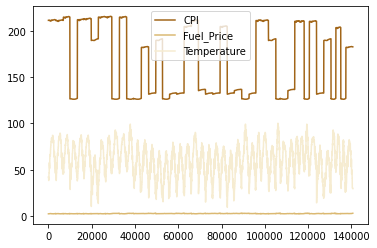

In [ ]:
negative_df.plot()

In [ ]:
df.columns

Index(['Unnamed: 0', 'Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Day', 'Month',
       'Year', 'Week_day', 'Holiday', 'IsHoliday'],
      dtype='object')

In [ ]:
df['Holiday']

0                  None
1                  None
2                  None
3                  None
4                  None
              ...      
140674    New Years Eve
140675    New Years Eve
140676    New Years Eve
140677    New Years Eve
140678    New Years Eve
Name: Holiday, Length: 140679, dtype: object

In [ ]:
df['Holiday']

0                  None
1                  None
2                  None
3                  None
4                  None
              ...      
140674    New Years Eve
140675    New Years Eve
140676    New Years Eve
140677    New Years Eve
140678    New Years Eve
Name: Holiday, Length: 140679, dtype: object

In [ ]:
df.groupby('Holiday')

In [ ]:
df.groupby('Holiday')['Unemployment'].sum()

Holiday
Black Friday      24760.115
Christmas         74537.653
Halloween         49445.188
New Years Eve     24827.347
None             990103.566
Thanksgiving      24561.099
Name: Unemployment, dtype: float64

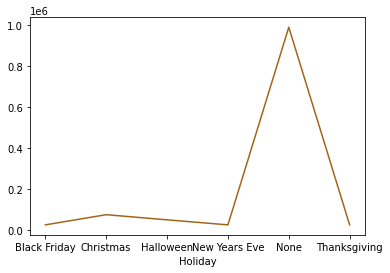

In [ ]:
df.groupby('Holiday')['Unemployment'].sum().plot()

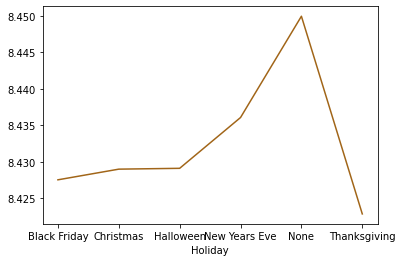

In [ ]:
df.groupby('Holiday')['Unemployment'].mean().plot()

In [ ]:
for holiday, data in df.groupby('Holiday'):
  print(f'The Holiday is = {holiday}')
  unemployed = data['Unemployment'].sum()
  print(f'Number of unemployoments for each holiday is = {unemployed}')

The Holiday is = Black Friday
Number of unemployoments for each holiday is = 24760.114999999998
The Holiday is = Christmas
Number of unemployoments for each holiday is = 74537.65299999999
The Holiday is = Halloween
Number of unemployoments for each holiday is = 49445.18800000001
The Holiday is = New Years Eve
Number of unemployoments for each holiday is = 24827.347
The Holiday is = None
Number of unemployoments for each holiday is = 990103.5660000001
The Holiday is = Thanksgiving
Number of unemployoments for each holiday is = 24561.099000000002


In [ ]:
df.columns

Index(['Unnamed: 0', 'Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Day', 'Month',
       'Year', 'Week_day', 'Holiday', 'IsHoliday'],
      dtype='object')

In [ ]:
for holiday, data in df.groupby('Holiday'):
  print(f'The Holiday is = {holiday}')
  weekly = data['Weekly_Sales'].sum()
  print(f'Number of weekly sales is = {weekly}')

The Holiday is = Black Friday
Number of weekly sales is = 65821003.239999995
The Holiday is = Christmas
Number of weekly sales is = 188877016.27999997
The Holiday is = Halloween
Number of weekly sales is = 86669500.47
The Holiday is = New Years Eve
Number of weekly sales is = 40432519.0
The Holiday is = None
Number of weekly sales is = 1861960497.24
The Holiday is = Thanksgiving
Number of weekly sales is = 45125584.18


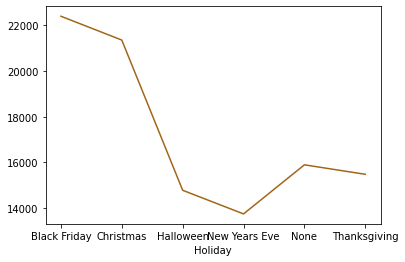

In [ ]:
figsize=(15,7)
df.groupby('Holiday')['Weekly_Sales'].mean().plot()

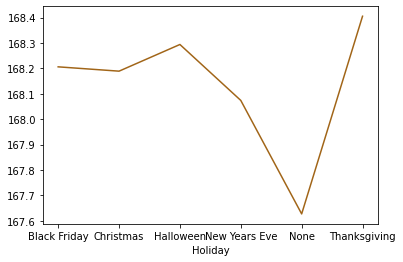

In [ ]:
figsize=(15,7)
df.groupby('Holiday')['CPI'].mean().plot()

In [ ]:
df.groupby('Weekly_Sales')

In [ ]:
figsize=(15,7)
df.groupby('Weekly_Sales')['Unemployment'].mean().plot()

In [ ]:
figsize=(15,7)
df.groupby('Weekly_Sales')['CPI'].mean().plot()

In [ ]:
df['CPI']

In [ ]:
import seaborn as sns

In [ ]:
#WANT

fix, ax = plt.subplots(figsize=(15,7))

df.groupby('Month')['Weekly_Sales'].mean().plot()
ax.legend(loc='upper left')
ax.set_title('Month Weekly Sales')
ax.grid(True)
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
#WANT
fix, ax = plt.subplots(figsize=(15,7))
df.groupby('Month')['Weekly_Sales'].mean().plot.barh()
plt.ylabel('Month')
plt.xlabel('Weekly Sales')
plt.show()

In [ ]:
#WANT
fix, ax = plt.subplots(figsize=(15,7))
df.plot('Month','Weekly_Sales')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
#WANT
fix, ax = plt.subplots(figsize=(15,7))
df.groupby('Month')['Weekly_Sales'].sum().plot()

In [ ]:
from sklearn import linear_model

In [ ]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [ ]:
figsize=(15,7)
df.groupby('Month')['Unemployment'].mean().plot()

In [ ]:
# Draw Plot
sns.set_palette("dark")
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['Month'] == 1, "Unemployment"], shade=True, label="Month=1", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 2, "Unemployment"], shade=True, label="Month=2", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 3, "Unemployment"], shade=True, label="Month=3", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 4, "Unemployment"], shade=True, label="Month=4", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 5, "Unemployment"], shade=True, label="Month=5", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 6, "Unemployment"], shade=True,  label="Month=6", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 8, "Unemployment"], shade=True, label="Month=8", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 9, "Unemployment"], shade=True, label="Month=9", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 10, "Unemployment"], shade=True, label="Month=10", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 11, "Unemployment"], shade=True, label="Month=11", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 12, "Unemployment"], shade=True, label="Month=12", alpha=.5)

# Decoration
plt.title('Monthly Unemployment', fontsize=18)
#csfont = {'fontname':'Comic Sans MS'}
#hfont = {'fontname':'Helvetica'}
#plt.rcParams["font.family"] = "Oswald"
#plt.title('title', fontname = 'Oswald')
#plt.title('title')
#plt.title('Monthly Unemployment', **csfont, fontsize=18)
#plt.xlabel('xlabel', **hfont)

plt.legend()
plt.show()

In [ ]:
# Draw Plot
sns.set_palette("dark")
plt.figure(figsize=(16,10), dpi = 100)
sns.kdeplot(df.loc[df['Month'] == 1, 'Weekly_Sales'], shade=False, label="Month=1", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 2, 'Weekly_Sales'], shade=False, label="Month=2", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 3, 'Weekly_Sales'], shade=False, label="Month=3", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 4, 'Weekly_Sales'], shade=False, label="Month=4", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 5, 'Weekly_Sales'], shade=False, label="Month=5", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 6, 'Weekly_Sales'], shade=False,  label="Month=6", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 8, 'Weekly_Sales'], shade=False, label="Month=8", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 9, 'Weekly_Sales'], shade=False, label="Month=9", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 10, 'Weekly_Sales'], shade=False, label="Month=10", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 11, 'Weekly_Sales'], shade=False, label="Month=11", alpha=.7)
sns.kdeplot(df.loc[df['Month'] == 12, 'Weekly_Sales'], shade=False, label="Month=12", alpha=.5)

# Decoration
plt.title('Monthly Weekly Sales', fontsize=18)
plt.legend()
plt.show()

In [ ]:
import numpy as np

In [ ]:
#WANT
fig, ax=plt.subplots(figsize=(15,7))
sns.set_palette("BrBG")
ax = sns.stripplot(x="Month", y="Weekly_Sales", data=df)
mean = df['Weekly_Sales'].mean()
#fix.axhline(mean,color = '#e0ba84')

In [ ]:
fig, ax=plt.subplots(figsize=(15,7))
sns.set_palette("BrBG")
ax = sns.regplot(x="Month", y="Weekly_Sales", data=df, x_jitter=.1)
#mean = df['Weekly_Sales'].mean()
#fix.axhline(mean,color = '#e0ba84')

In [ ]:
from dateutil.parser import parse 

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('Unemployment').count()['Weekly_Sales'].plot(ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Unemployment')['Weekly_Sales'].mean().plot(legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Unemployment')['Weekly_Sales'].mean().plot(kind = 'bar', legend=True)

In [ ]:
sns.stripplot(x="Unemployment", y="Weekly_Sales", data=df)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Unemployment')['Weekly_Sales'].sum().plot(legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.regplot(x="CPI", y="Weekly_Sales", data= df , x_estimator=np.mean, logx=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Month')['Weekly_Sales'].mean().plot(legend=True,)

In [ ]:

fig, ax = plt.subplots(figsize=(15,7))

df.groupby('Day')['Weekly_Sales'].mean().plot(legend=True, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Day')['Weekly_Sales'].sum().plot(legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Day','Unemployment']).count()['Weekly_Sales'].plot(ax=ax)

In [ ]:
df.columns

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Holiday')['Weekly_Sales'].sum().plot(legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Holiday')['Weekly_Sales'].mean().plot(legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Holiday')['Weekly_Sales'].mean().plot(kind='bar',legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Holiday')['Weekly_Sales'].sum().plot(kind='bar',legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Holiday')['Unemployment'].sum().plot(legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Holiday')['Unemployment'].mean().plot(legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Holiday')['Unemployment'].plot(legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
df.groupby('Holiday')['Unemployment'].sum().plot(kind='bar',legend=True)

In [ ]:
print(df.groupby('Holiday'))

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Holiday','CPI']).count()['Weekly_Sales'].plot()
plt.xticks(rotation = 360, ha= 'center')

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Holiday','CPI']).count()['Weekly_Sales'].plot(kind='bar',ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Holiday','CPI']).mean()['Weekly_Sales'].plot(kind='bar',ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Holiday','CPI']).sum()['Weekly_Sales'].plot(kind='bar',ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('CPI')['Holiday'].count().plot(kind='bar',ax=ax)

In [ ]:
#WANT hidden slide
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Holiday')['CPI'].mean().plot(kind='bar',legend=True)

In [ ]:
df.groupby('Weekly_Sales')

In [ ]:
#WANT hidden slide
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Month')['CPI'].mean().plot(kind='bar',legend=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Holiday','CPI']).count()['Weekly_Sales'].plot(ax=ax)

In [ ]:
for month, data in df.groupby('Month'):
  print(f'Month = {month}')
  week = data['Weekly_Sales'].sum()
  print(f'Number ofweekly sales = {week}')

In [ ]:
for holiday, data in df.groupby('Holiday'):
  print(f'Holiday = {holiday}')
  week = data['Weekly_Sales'].sum()
  print(f'Number ofweekly sales = {week}')